In [1]:
from CoqGym.gallina import GallinaTermParser
from lark import Tree, Token
from pygments.lexers import CoqLexer
from functools import reduce

import numpy as np
import sys

from typing import List, Tuple, Union

import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

from griffon.preprocessing.pipeline.stage1.recreate_term import Stage1StatementCreator

In [2]:
term = '@eq nat ((fun a : nat => Nat.add a (S O)) n) (Nat.add (S O) n)'
sexp = '(App (Ind (((Mutind (MPfile (DirPath ((Id Peano) (Id Init) (Id Coq)))) (DirPath ()) (Id le)) 0) (Instance ()))) ((Construct ((((Mutind (MPfile (DirPath ((Id Datatypes) (Id Init) (Id Coq)))) (DirPath ()) (Id nat)) 0) 1) (Instance ()))) (App (Fix (((0 0) 0) (((Name (Id tree_size)) (Name (Id forest_size))) ((Prod (Name (Id t)) (Ind (((Mutind (MPfile (DirPath ((Id SerTop)))) (DirPath ()) (Id tree)) 0) (Instance ()))) (Ind (((Mutind (MPfile (DirPath ((Id Datatypes) (Id Init) (Id Coq)))) (DirPath ()) (Id nat)) 0) (Instance ())))) (Prod (Name (Id f)) (Ind (((Mutind (MPfile (DirPath ((Id SerTop)))) (DirPath ()) (Id tree)) 1) (Instance ()))) (Ind (((Mutind (MPfile (DirPath ((Id Datatypes) (Id Init) (Id Coq)))) (DirPath ()) (Id nat)) 0) (Instance ()))))) ((Lambda (Name (Id t)) (Ind (((Mutind (MPfile (DirPath ((Id SerTop)))) (DirPath ()) (Id tree)) 0) (Instance ()))) (Case ((ci_ind ((Mutind (MPfile (DirPath ((Id SerTop)))) (DirPath ()) (Id tree)) 0)) (ci_npar 0) (ci_cstr_ndecls (2)) (ci_cstr_nargs (2)) (ci_pp_info ((ind_tags ()) (cstr_tags ((false false))) (style RegularStyle)))) (Lambda (Name (Id t)) (Ind (((Mutind (MPfile (DirPath ((Id SerTop)))) (DirPath ()) (Id tree)) 0) (Instance ()))) (Ind (((Mutind (MPfile (DirPath ((Id Datatypes) (Id Init) (Id Coq)))) (DirPath ()) (Id nat)) 0) (Instance ())))) (Rel 1) ((Lambda (Name (Id a)) (Const ((Constant (MPfile (DirPath ((Id SerTop)))) (DirPath ()) (Id A)) (Instance ()))) (Lambda (Name (Id f)) (Ind (((Mutind (MPfile (DirPath ((Id SerTop)))) (DirPath ()) (Id tree)) 1) (Instance ()))) (App (Construct ((((Mutind (MPfile (DirPath ((Id Datatypes) (Id Init) (Id Coq)))) (DirPath ()) (Id nat)) 0) 2) (Instance ()))) ((App (Rel 4) ((Rel 1)))))))))) (Lambda (Name (Id f)) (Ind (((Mutind (MPfile (DirPath ((Id SerTop)))) (DirPath ()) (Id tree)) 1) (Instance ()))) (Case ((ci_ind ((Mutind (MPfile (DirPath ((Id SerTop)))) (DirPath ()) (Id tree)) 1)) (ci_npar 0) (ci_cstr_ndecls (1 2)) (ci_cstr_nargs (1 2)) (ci_pp_info ((ind_tags ()) (cstr_tags ((false) (false false))) (style RegularStyle)))) (Lambda (Name (Id f)) (Ind (((Mutind (MPfile (DirPath ((Id SerTop)))) (DirPath ()) (Id tree)) 1) (Instance ()))) (Ind (((Mutind (MPfile (DirPath ((Id Datatypes) (Id Init) (Id Coq)))) (DirPath ()) (Id nat)) 0) (Instance ())))) (Rel 1) ((Lambda (Name (Id b)) (Const ((Constant (MPfile (DirPath ((Id SerTop)))) (DirPath ()) (Id B)) (Instance ()))) (App (Construct ((((Mutind (MPfile (DirPath ((Id Datatypes) (Id Init) (Id Coq)))) (DirPath ()) (Id nat)) 0) 2) (Instance ()))) ((Construct ((((Mutind (MPfile (DirPath ((Id Datatypes) (Id Init) (Id Coq)))) (DirPath ()) (Id nat)) 0) 1) (Instance ())))))) (Lambda (Name (Id t)) (Ind (((Mutind (MPfile (DirPath ((Id SerTop)))) (DirPath ()) (Id tree)) 0) (Instance ()))) (Lambda (Name (Id "f\'")) (Ind (((Mutind (MPfile (DirPath ((Id SerTop)))) (DirPath ()) (Id tree)) 1) (Instance ()))) (App (Const ((Constant (MPfile (DirPath ((Id Nat) (Id Init) (Id Coq)))) (DirPath ()) (Id add)) (Instance ()))) ((App (Rel 5) ((Rel 2))) (App (Rel 4) ((Rel 1)))))))))))))) ((Var (Id t))))))'


term_parser = GallinaTermParser(caching=False)
tree = term_parser.parse(sexp)


statement_creator = Stage1StatementCreator(term_parser)
res = statement_creator(sexp, "hypothesis")

" ".join(res.tokens)

'hypothesis Peano Init Coq le 0 Datatypes Init Coq nat 0 1 fix tree_size forall t SerTop tree 0 Datatypes Init Coq nat 0 lambda t SerTop tree 0 match lambda t SerTop tree 0 Datatypes Init Coq nat 0 t lambda a SerTop A lambda f SerTop tree 1 Datatypes Init Coq nat 0 2 forest_size f forest_size forall f SerTop tree 1 Datatypes Init Coq nat 0 lambda f SerTop tree 1 match lambda f SerTop tree 1 Datatypes Init Coq nat 0 f lambda b SerTop B Datatypes Init Coq nat 0 2 Datatypes Init Coq nat 0 1 lambda t SerTop tree 0 lambda "f\'" SerTop tree 1 Nat Init Coq add tree_size t forest_size "f\'" t'

DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved


@eq nat ((fun a : nat => Nat.add a (S O)) n) (Nat.add (S O) n)


DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved


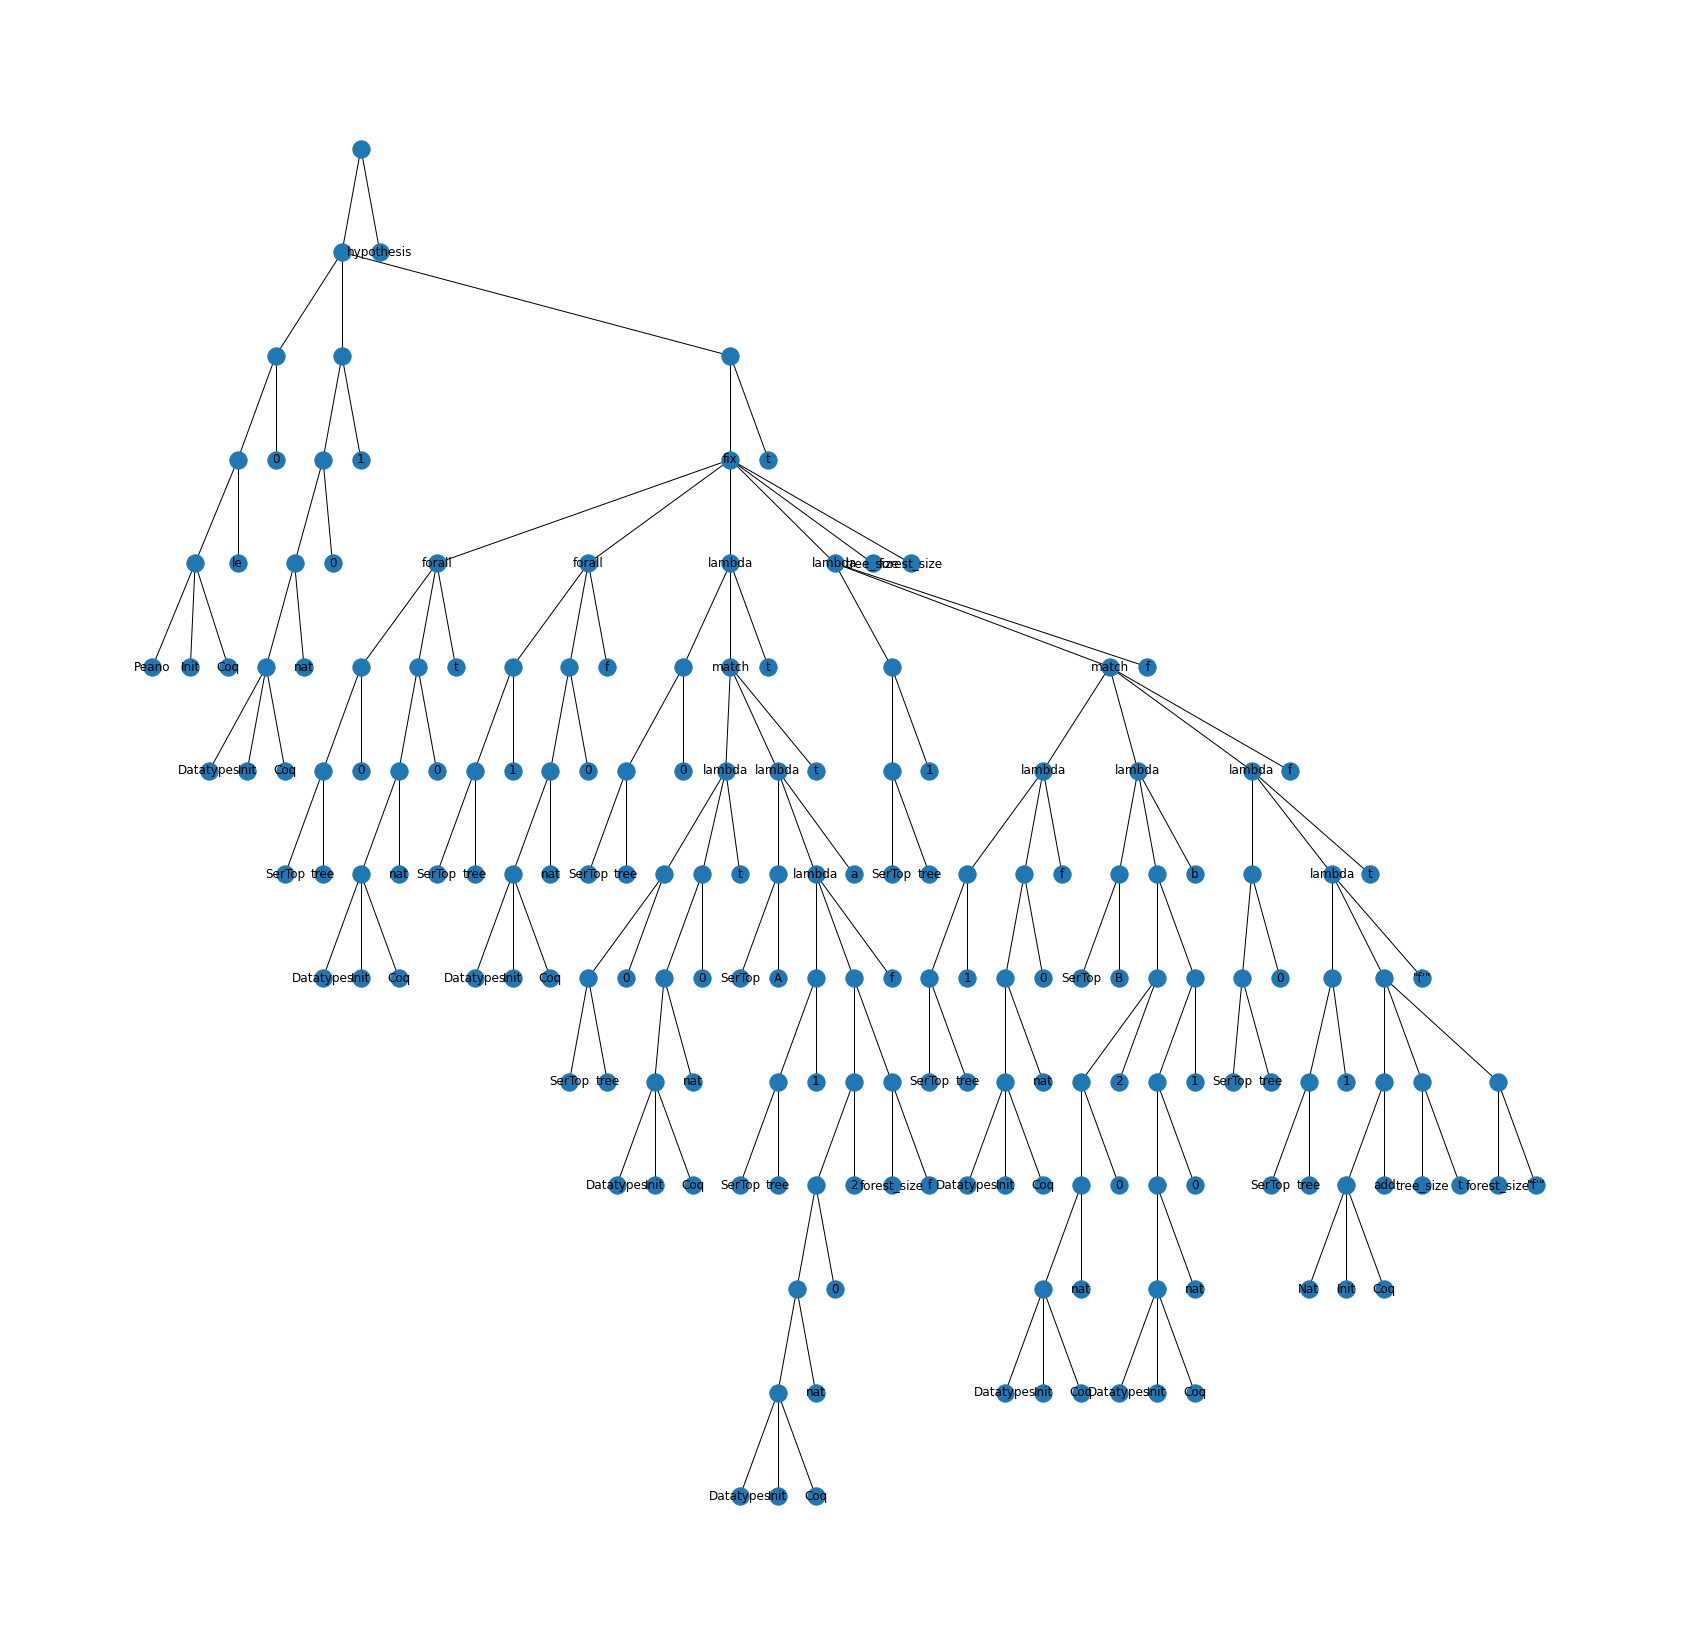

In [6]:
import pickle

sample = pickle.load(open("../recommandations/train/train_proj/test/proof0002.pickle", "rb"))
res = sample.goal
concat_tokens = ["_".join(token.subtokens) for token in res.tokens]
" ".join(concat_tokens)

'goal Peano Init Coq le 0 Datatypes Init Coq nat 0 1 fix tree_size forall t SerTop tree 0 Datatypes Init Coq nat 0 lambda t SerTop tree 0 match lambda t SerTop tree 0 Datatypes Init Coq nat 0 t lambda a SerTop A lambda f SerTop tree 1 Datatypes Init Coq nat 0 2 forest_size f forest_size forall f SerTop tree 1 Datatypes Init Coq nat 0 lambda f SerTop tree 1 match lambda f SerTop tree 1 Datatypes Init Coq nat 0 f lambda b SerTop B Datatypes Init Coq nat 0 2 Datatypes Init Coq nat 0 1 lambda t SerTop tree 0 lambda f SerTop tree 1 Nat Init Coq add tree_size t forest_size f t'

In [16]:
import matplotlib.pyplot as plt


pos = graphviz_layout(graph, prog="dot")

_, axs = plt.subplots(1,1, figsize=(30,30))

nx.draw(graph, pos, ax = axs)
labels = {node_id : token for token, node_id in zip(res.tokens, res.token_to_node.values())}
nx.draw_networkx_labels(graph, pos, labels)
str_to_node = {tok : res.token_to_node[index] for index, tok in enumerate(res.tokens)}
print(str_to_node)

print(" ".join(sample.goal.tokens))

graph:nx.Graph = sample.goal.ast
matrix = nx.to_numpy_matrix(graph, range(graph.number_of_nodes()))

np.set_printoptions(threshold=sys.maxsize)
matrix

# goal 
# Logic Init Coq eq 0 
#     Datatypes Init Coq nat 0 
#     Nat Init Coq add 
#         a Datatypes Init Coq nat 0 
#         b 
#     Nat Init Coq add 
#         b 
#         a

NameError: name 'graph' is not defined

goal Peano Init Coq le 0 Datatypes Init Coq nat 0 1 fix tree_size forall t SerTop tree 0 Datatypes Init Coq nat 0 lambda t SerTop tree 0 match lambda t SerTop tree 0 Datatypes Init Coq nat 0 t lambda a SerTop A lambda f SerTop tree 1 Datatypes Init Coq nat 0 2 forest_size f forest_size forall f SerTop tree 1 Datatypes Init Coq nat 0 lambda f SerTop tree 1 match lambda f SerTop tree 1 Datatypes Init Coq nat 0 f lambda b SerTop B Datatypes Init Coq nat 0 2 Datatypes Init Coq nat 0 1 lambda t SerTop tree 0 lambda f' SerTop tree 1 Nat Init Coq add tree_size t forest_size f' t
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 

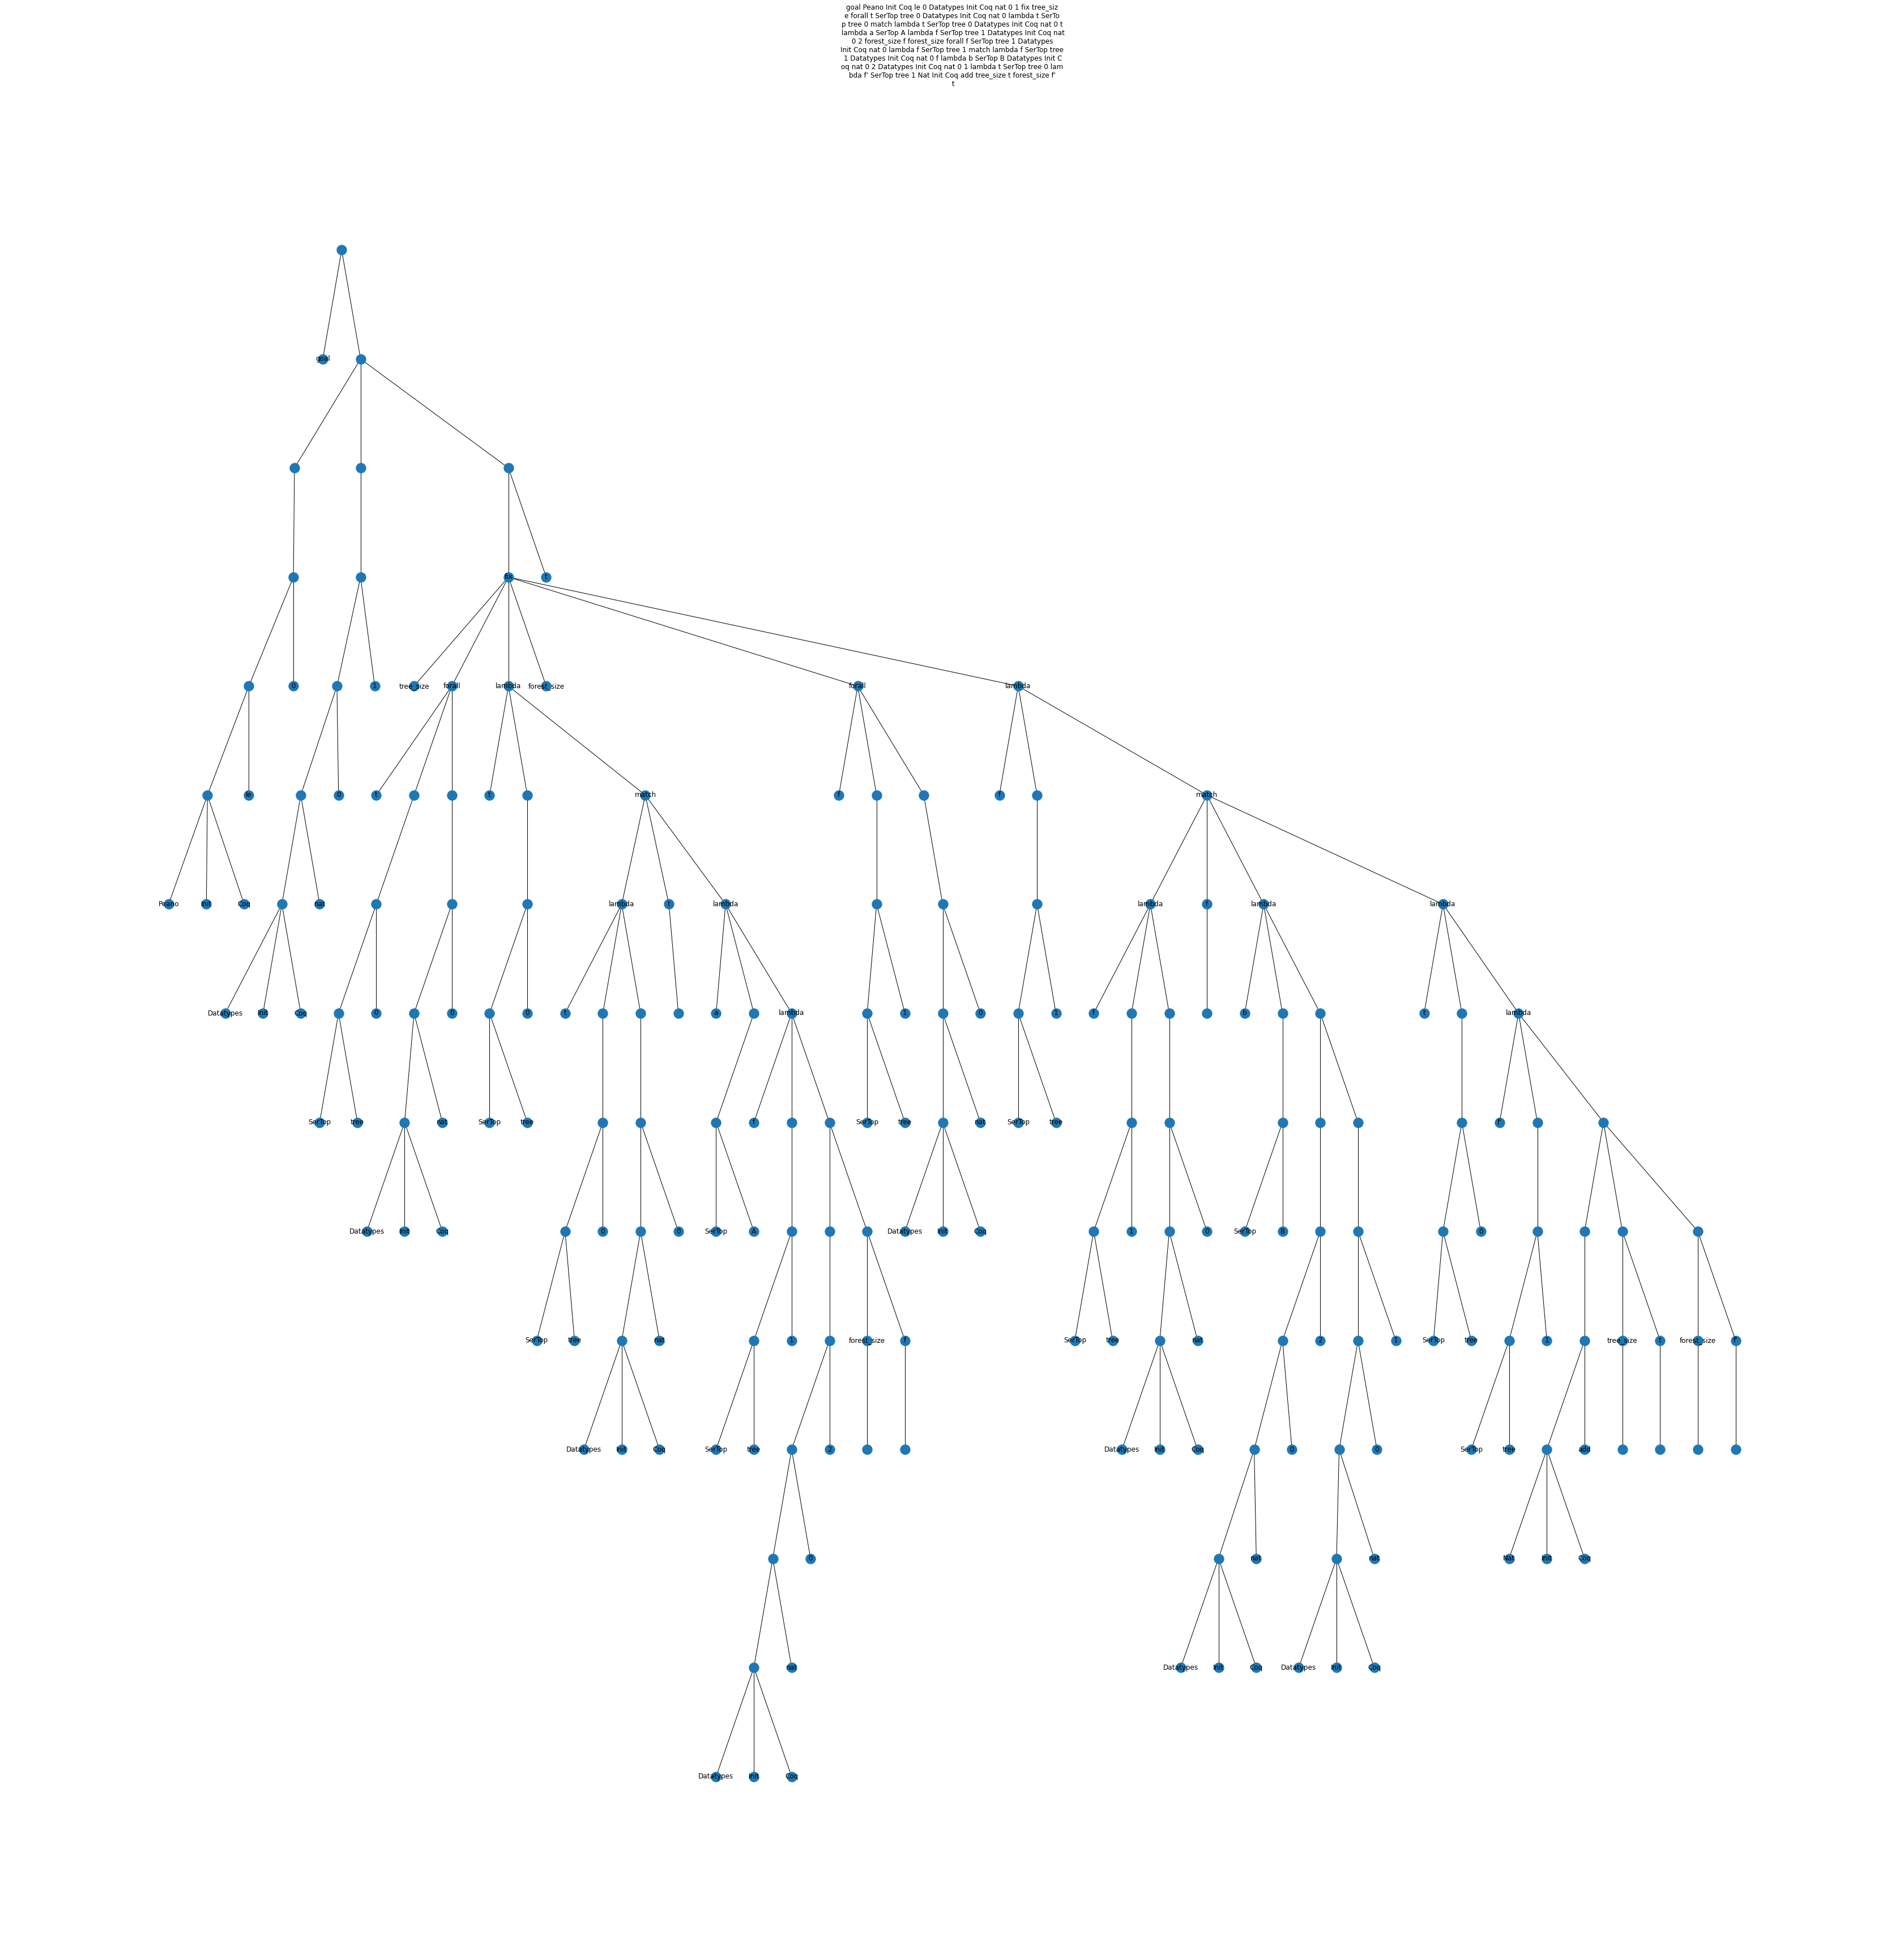

In [81]:
from griffon.preprocessing.graph.distances import DistanceBinning, ShortestPaths, SiblingShortestPaths
from griffon.preprocessing.graph.transform import DistancesTransformer
from griffon.preprocessing.graph.binning import ExponentialBinning
from griffon.constants import NUM_BINS
from griffon.coq_dataclasses import Stage1Statement
import pickle

import logging
logging.getLogger('matplotlib').setLevel(logging.WARNING)
import matplotlib.pyplot as plt

sample = pickle.load(open("../recommandations/train/train_proj/test/proof0002.pickle", "rb"))
res = sample.goal
print(" ".join(res.tokens))

def draw_statement(sample:Stage1Statement, ax=None):

    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=(60,60))

    def insert_newlines(string, every=64):
        return '\n'.join(string[i:i+every] for i in range(0, len(string), every))

    graph = nx.from_dict_of_lists(sample.ast)
    print(graph.nodes())
    # pos = graphviz_layout(graph, prog="dot")
    pos = graphviz_layout(graph, prog="dot")

    nx.draw(graph, pos, ax = ax)
    labels = {node_id : token for token, node_id in zip(sample.tokens, sample.token_to_node.values())}
    nx.draw_networkx_labels(graph, pos, labels, ax=ax)

    title = " ".join(sample.tokens)
    title = insert_newlines(title)
    
    ax.title.set_text(title)

draw_statement(sample.goal)




In [70]:

N_FIXED_BINS = 9, 
EXPONENTIAL_BINNING_GROWTH_FACTOR = 1.3

distance_metrics = [SiblingShortestPaths()]

db = DistanceBinning(NUM_BINS, N_FIXED_BINS, ExponentialBinning(EXPONENTIAL_BINNING_GROWTH_FACTOR))
distances_transformer = DistancesTransformer(distance_metrics, db)

processed_sample = distances_transformer(sample)

torch.Size([212, 212])
tensor([[  1,   2],
        [  2,   1],
        [  3,  12],
        [  3,  23],
        [  5,  11],
        [  6,  10],
        [  7,   8],
        [  7,   9],
        [  8,   7],
        [  8,   9],
        [  9,   7],
        [  9,   8],
        [ 10,   6],
        [ 11,   5],
        [ 12,   3],
        [ 12,  23],
        [ 14,  22],
        [ 15,  21],
        [ 16,  20],
        [ 17,  18],
        [ 17,  19],
        [ 18,  17],
        [ 18,  19],
        [ 19,  17],
        [ 19,  18],
        [ 20,  16],
        [ 21,  15],
        [ 22,  14],
        [ 23,   3],
        [ 23,  12],
        [ 24, 211],
        [ 25,  26],
        [ 25,  43],
        [ 25, 102],
        [ 25, 103],
        [ 25, 120],
        [ 26,  25],
        [ 26,  43],
        [ 26, 102],
        [ 26, 103],
        [ 26, 120],
        [ 27,  28],
        [ 27,  34],
        [ 28,  27],
        [ 28,  34],
        [ 30,  33],
        [ 31,  32],
        [ 32,  31],
        [ 33,  30

{1: Text(321.0, 954.0, 'goal'),
 7: Text(27.0, 594.0, 'Peano'),
 8: Text(99.0, 594.0, 'Init'),
 9: Text(171.0, 594.0, 'Coq'),
 10: Text(180.0, 666.0, 'le'),
 11: Text(265.0, 738.0, '0'),
 17: Text(135.0, 522.0, 'Datatypes'),
 18: Text(207.0, 522.0, 'Init'),
 19: Text(279.0, 522.0, 'Coq'),
 20: Text(315.0, 594.0, 'nat'),
 21: Text(351.0, 666.0, '0'),
 22: Text(420.0, 738.0, '1'),
 24: Text(675.0, 810.0, 'fix'),
 25: Text(495.0, 738.0, 'tree_size'),
 26: Text(567.0, 738.0, 'forall'),
 27: Text(423.0, 666.0, 't'),
 31: Text(315.0, 450.0, 'SerTop'),
 32: Text(387.0, 450.0, 'tree'),
 33: Text(423.0, 522.0, '0'),
 38: Text(405.0, 378.0, 'Datatypes'),
 39: Text(477.0, 378.0, 'Init'),
 40: Text(549.0, 378.0, 'Coq'),
 41: Text(549.0, 450.0, 'nat'),
 42: Text(567.0, 522.0, '0'),
 43: Text(675.0, 738.0, 'lambda'),
 44: Text(639.0, 666.0, 't'),
 48: Text(639.0, 450.0, 'SerTop'),
 49: Text(711.0, 450.0, 'tree'),
 50: Text(711.0, 522.0, '0'),
 51: Text(936.0, 666.0, 'match'),
 52: Text(891.0, 594.0,

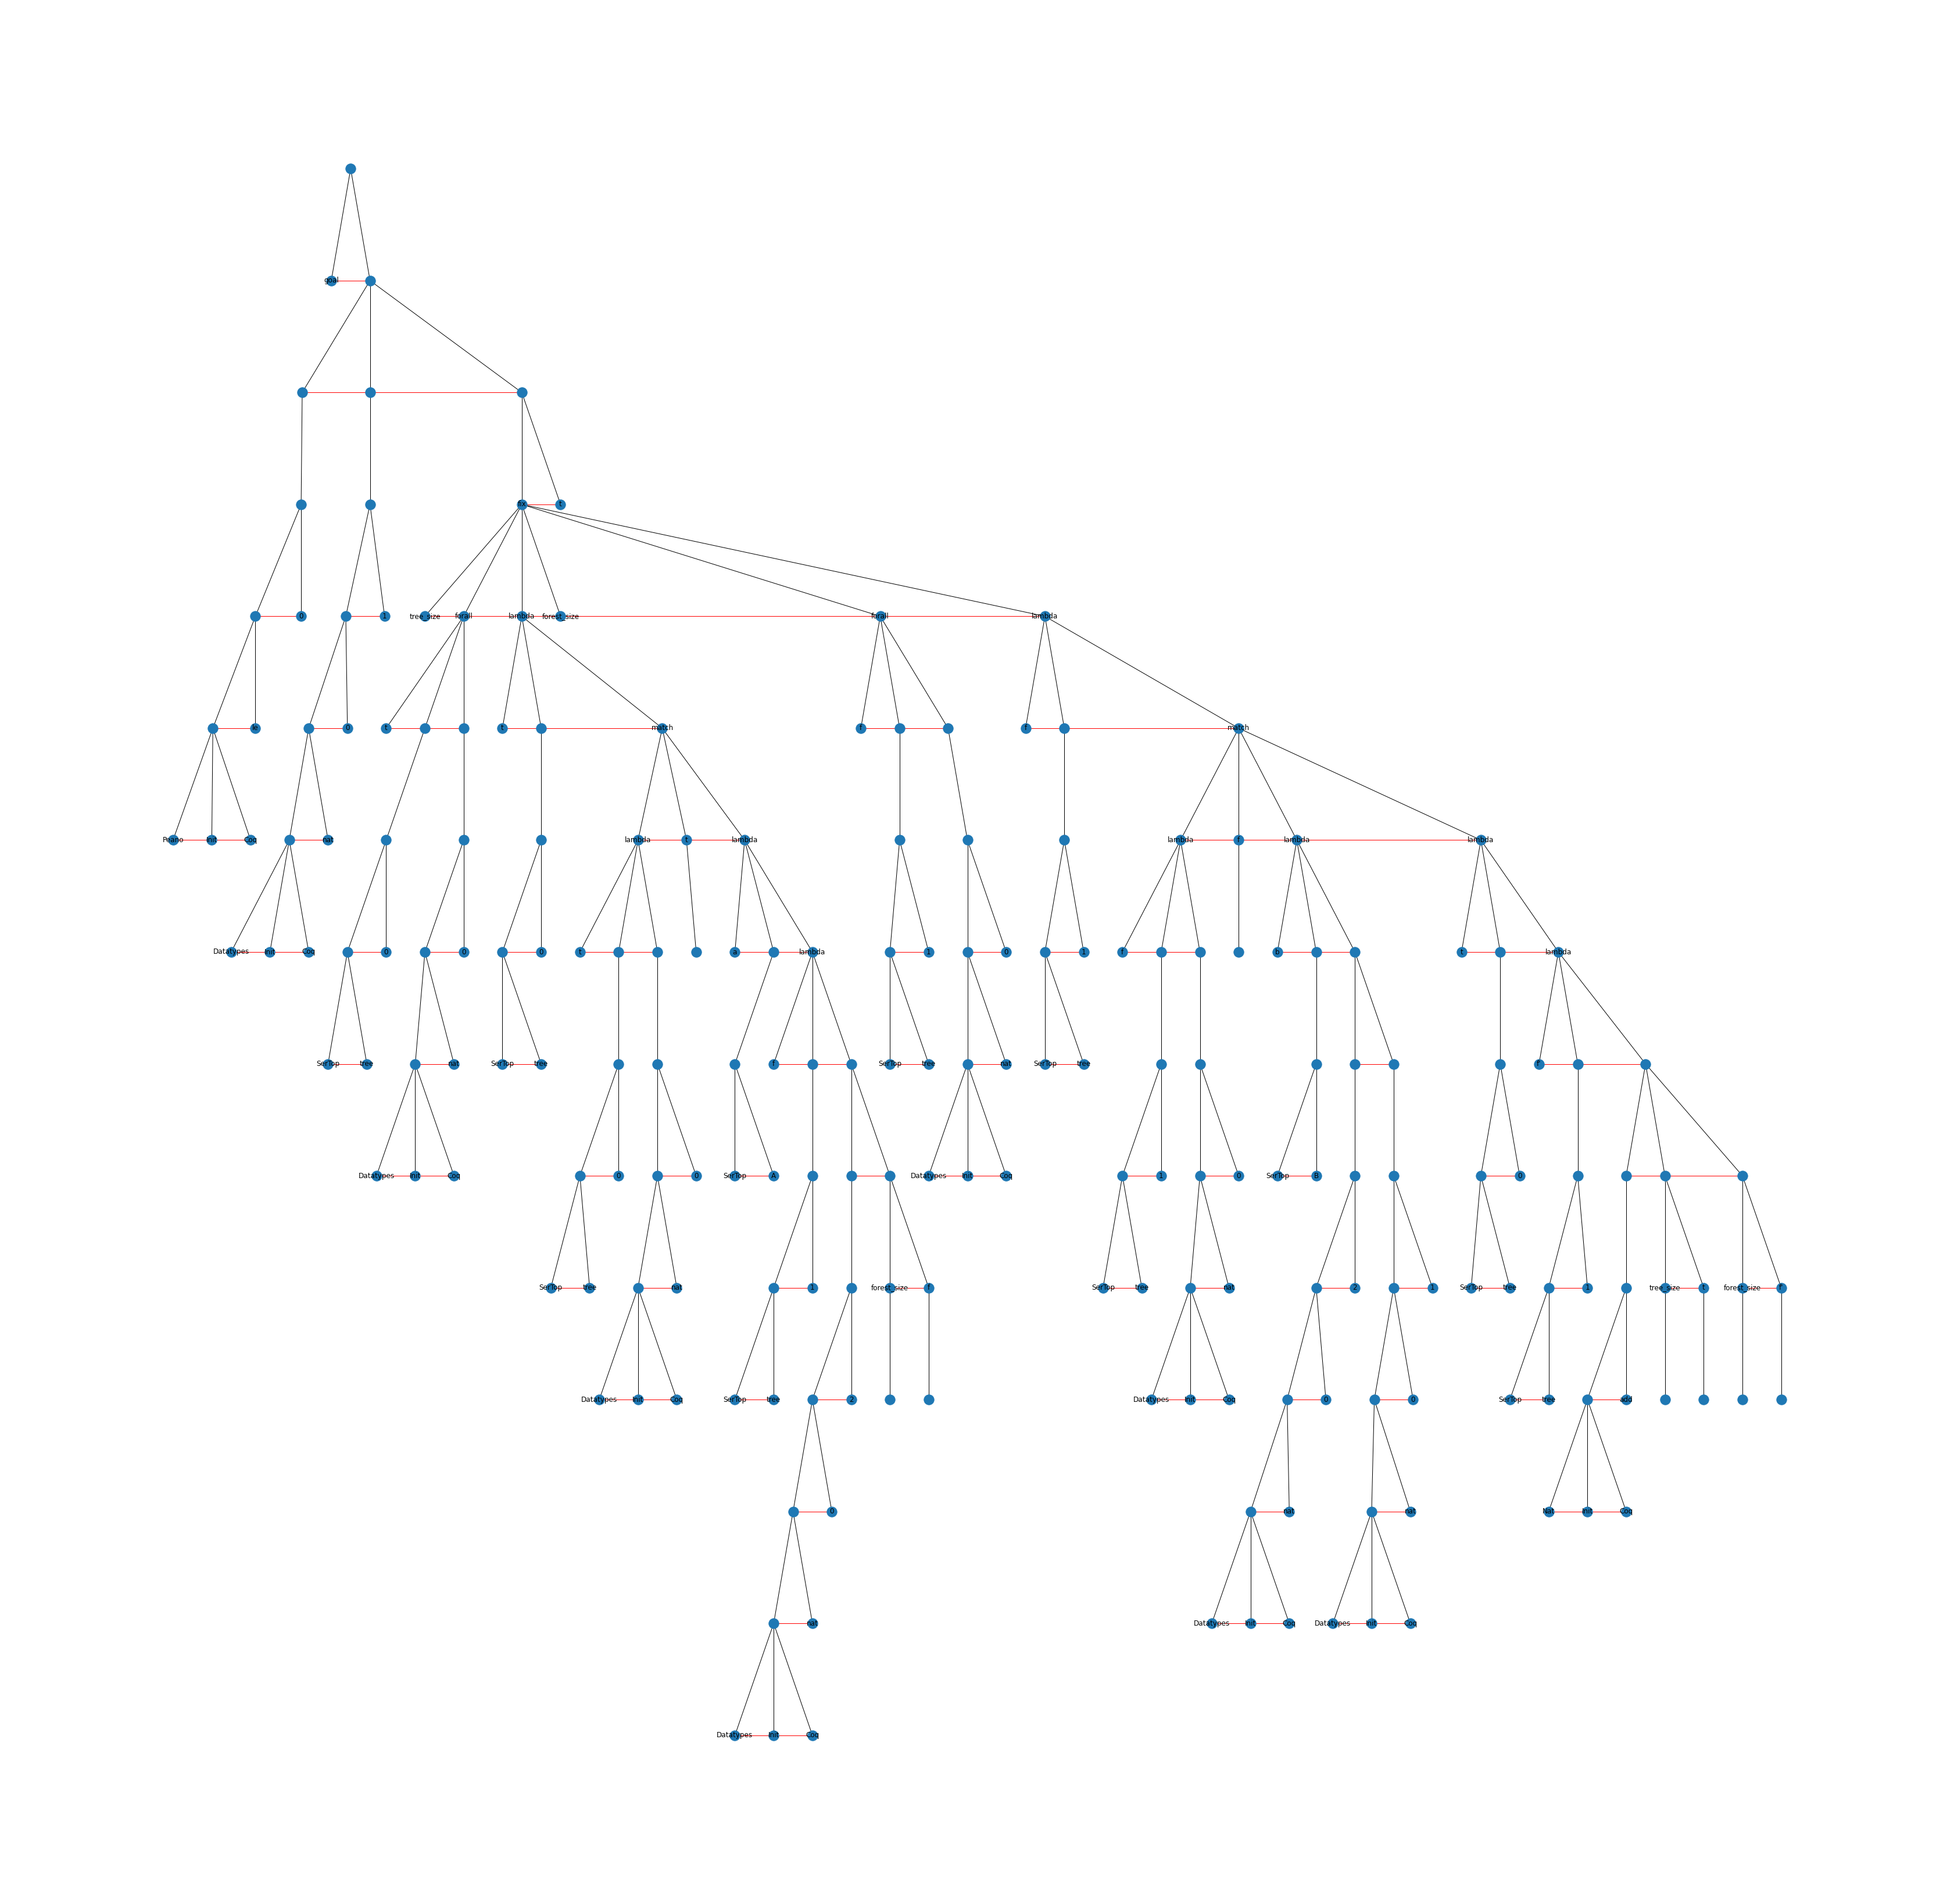

In [82]:
statement = processed_sample.goal
print(statement.adjacency_matrix.shape)
distance_matrix, bins, _ = statement.distances[0]

sampled_distance_matrix = bins[distance_matrix]
sampled_distance_matrix[sampled_distance_matrix > 100] = 0

def get_graph_from_adjacency(adj):
    rows, cols = np.where(adj != 0)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    return gr

print(sampled_distance_matrix.nonzero())


fig, ax = plt.subplots(1,1,figsize=(60,60))
graph = nx.from_dict_of_lists(sample.goal.ast)
# pos = graphviz_layout(graph, prog="dot")
pos = graphviz_layout(graph, prog="dot")
nx.draw(graph, pos, ax=ax)

sibling_graph = get_graph_from_adjacency(sampled_distance_matrix)

nx.draw_networkx_edges(sibling_graph, pos, edge_color="red")

labels = {node_id : token for token, node_id in zip(sample.goal.tokens, sample.goal.token_to_node.values())}
nx.draw_networkx_labels(graph, pos, labels, ax=ax)


In [68]:
tokens_2_node = [(statement.tokens[index],node_id) for index, node_id in statement.token_to_node.items()]

print(tokens_2_node)

print(sample.goal.ast[24])
print(statement.adjacency_matrix[24].nonzero())
print(sampled_distance_matrix[25].nonzero())

[('goal', 1), ('Peano', 7), ('Init', 8), ('Coq', 9), ('le', 10), ('0', 11), ('Datatypes', 17), ('Init', 18), ('Coq', 19), ('nat', 20), ('0', 21), ('1', 22), ('fix', 24), ('tree_size', 25), ('forall', 27), ('t', 28), ('SerTop', 32), ('tree', 33), ('0', 34), ('Datatypes', 39), ('Init', 40), ('Coq', 41), ('nat', 42), ('0', 43), ('lambda', 61), ('t', 62), ('SerTop', 66), ('tree', 67), ('0', 68), ('match', 69), ('lambda', 70), ('t', 71), ('SerTop', 75), ('tree', 76), ('0', 77), ('Datatypes', 82), ('Init', 83), ('Coq', 84), ('nat', 85), ('0', 86), ('t', 87), ('lambda', 89), ('a', 90), ('SerTop', 93), ('A', 94), ('lambda', 95), ('f', 96), ('SerTop', 100), ('tree', 101), ('1', 102), ('Datatypes', 109), ('Init', 110), ('Coq', 111), ('nat', 112), ('0', 113), ('2', 114), ('forest_size', 116), ('f', 118), ('forest_size', 26), ('forall', 44), ('f', 45), ('SerTop', 49), ('tree', 50), ('1', 51), ('Datatypes', 56), ('Init', 57), ('Coq', 58), ('nat', 59), ('0', 60), ('lambda', 120), ('f', 121), ('SerTo

In [80]:
list(enumerate(statement.tokens))

my_string = statement.tokens[119]
if my_string.startswith('"'):
    my_string = my_string[1:-1]

print(my_string)

f'
